# Predicting Breast Cancer Using Classification Algorithms.

###### Pratik Geoffrey Saxena
###### $25^{th}$ January 2020

# Introduction
----

The contents of this notebook will follow the outline below:
    
1. **The Data** - *Exploratory Data Analysis*
2. **Relationships between the Data** - *Feature Selection*
3. **My $1^{st}$ Model** - *Building a Logistic Regression Model*
4. **My $1^{st}$ Prediction** - *Making Predictions with the Logistic Regression Model*
5. **My $2^{nd}$ Model** - *Building a K-Nearest Neighbors Model*
6. **My $2^{nd}$ Prediction** - *Making Predictions with the K-Nearest Neighbors Model*
7. **My $3^{rd}$ Model** - *Building a Naive Bayes Model*
8. **My $3^{rd}$ Prediction** - *Making Predictions with the Naive Bayes Model*



"A picture is worth a thousand words", therefore keeping this in mind I have tried to include Visualizations wherever necessary.




# 1. The Data
----
*Extracted from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)*


### Attribute Information:

* **id** 
* **diagnosis**: M = malignant, B = benign

*Columns 3 to 32* 

Ten real-valued features are computed for each cell nucleus: 

* **radius**: distances from center to points on the perimeter 
* **texture**: standard deviation of gray-scale values
* **perimeter** 
* **area** 
* **smoothness**: local variation in radius lengths 
* **compactness**: perimeter^2 / area - 1.0 
* **concavity**: severity of concave portions of the contour
* **concave points**: number of concave portions of the contour
* **symmetry** 
* **fractal dimension**: "coastline approximation" - 1

In the given Dataset: The Mean, The Standard Error and The Worst(i.e The Mean Of the Largest Values) of all these features were computed for each image, thus we have 30 columns. 

To explain this further, if you look closely at the column names:
Column No. 6 i.e Mean Area, Column No. 16 Standard Error Area, and Column No. 26 Worst Area, all correspond to Area.   

----

In [1]:
# Data Manipulation and Analysis 
# Numeric Python
import pandas as pd
import numpy as np

# Math Library
import math

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Package
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split, cross_val_score


import statsmodels.api as sm
import statsmodels.formula.api as smf


# initializing default package settings
sns.set(style = "whitegrid", color_codes = True, font_scale = 1.5)

%matplotlib inline

#### *Importing the Data*

In [2]:
# Importing the Dataset & Reading the first 10 rows. 

df = pd.read_csv("Breast_Cancer.csv")

df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


Column named **Unnamed:32** has a lot of missing values. 
Next we shall proceed to check for any missing values in other columns. 

#### *Analyzing the Data*

In [3]:
print("No. of Patients in Dataset: " + str(len(df.id)))

No. of Patients in Dataset: 569


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
# Dropping Column 'Unnamed: 32' 

df = df.drop('Unnamed: 32', axis = 1)

In [6]:
# Checking Data type of each Column
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Our Target class: **diagnosis** 
has 2 classes, namely, 'B' for Benign and 'M' for Malignant.

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign:  62.74 %
% of cells labeled Malignant:  37.26 %


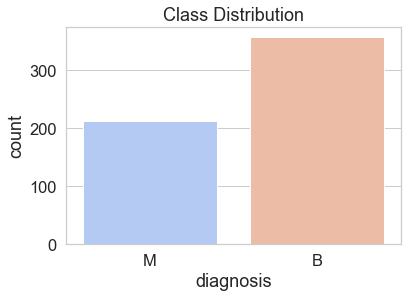

<Figure size 720x360 with 0 Axes>

In [7]:
# Countplot to see distribution of data in both classes 
sns.countplot(df['diagnosis'], palette = 'coolwarm' ).set_title("Class Distribution")
plt.figure(figsize = (10, 5))

# Actual Numbers in each class
benign, malignant = df['diagnosis'].value_counts()

#Printing out the values
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign: ', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Malignant: ', round(malignant / len(df) * 100, 2), '%')

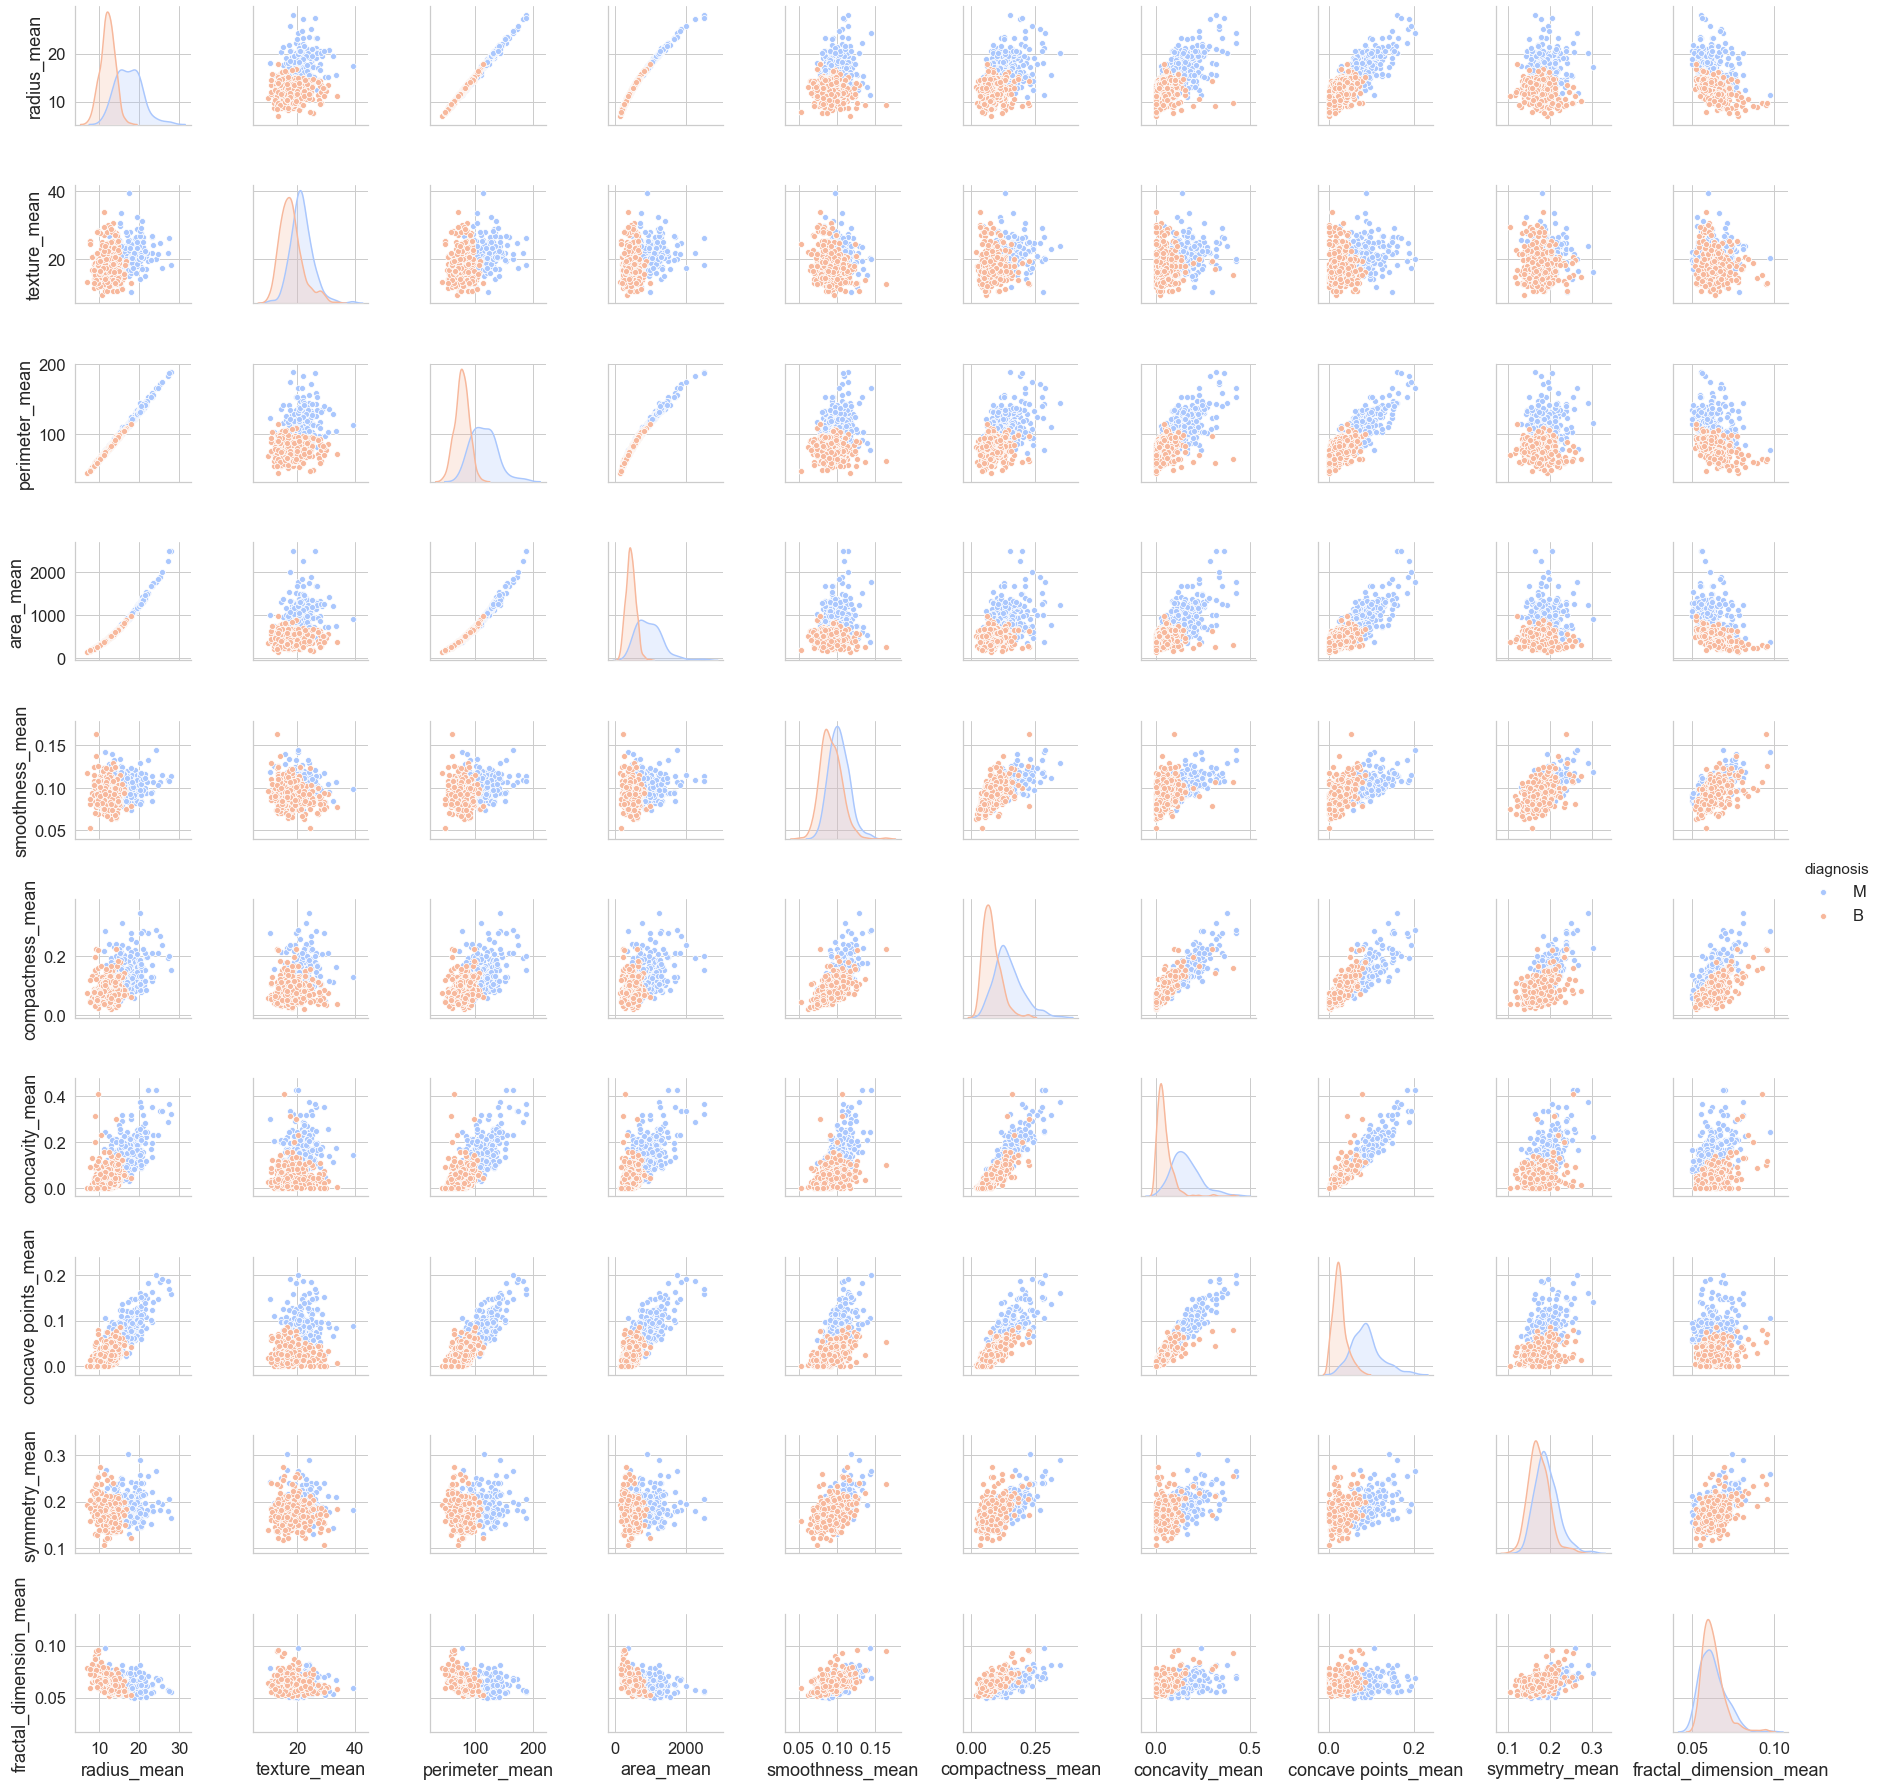

In [8]:
# A Scatter Plot for all the columns indicating the mean

cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

scatter = sns.pairplot(data = df[cols], hue = 'diagnosis', palette = 'coolwarm')

There are some interesting patterns visible. For instance, the almost perfectly linear patterns between the **radius** & **perimeter**, **radius** & **area**, and **perimeter** & **area** attributes show the presence of Multi Collinearity.

# 2. Relationships between the Data

Here we shall take a look at Correlation between our Observations. To facilitate this, we will create a Correlation matrix.

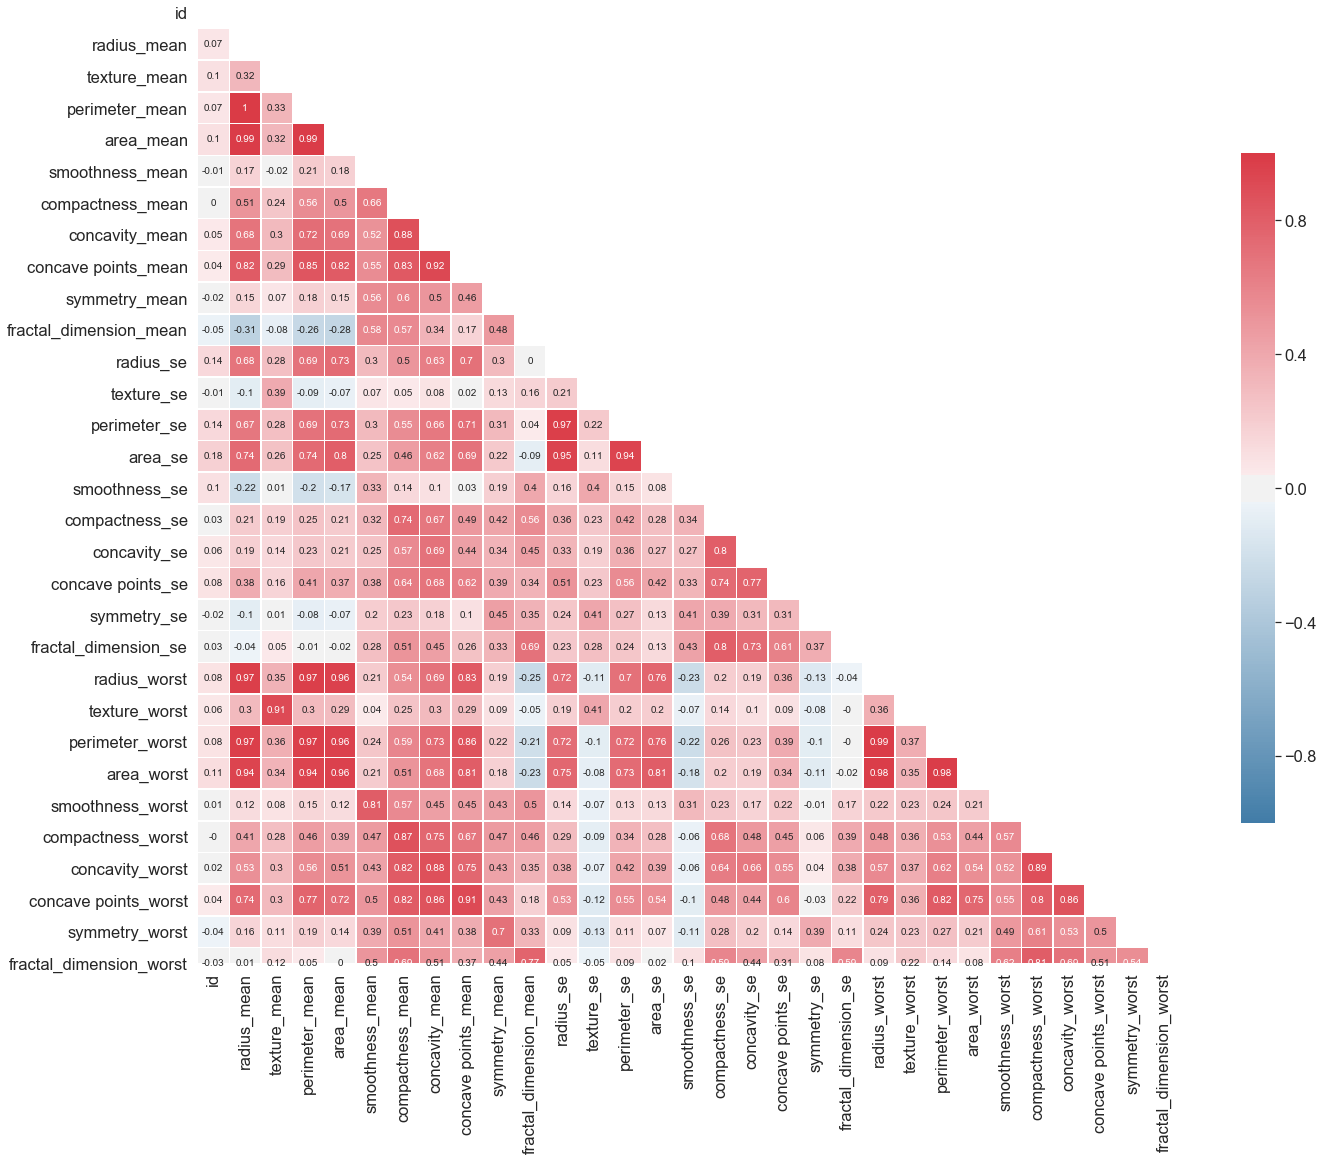

In [9]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Covering the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set the figure size
f, ax = plt.subplots(figsize=(20, 20))

# Defining a custom colormap
cmap = sns.diverging_palette(240, 10, n = 9, as_cmap = True)

# Plotting a Heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5}, annot = True)

plt.tight_layout()

In [10]:
# Dropping all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']

df = df.drop(cols, axis=1)

# Dropping all columns related to "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']

df = df.drop(cols, axis=1)

# Dropping all columns related to "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']

df = df.drop(cols, axis=1)

# Listing remaining columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

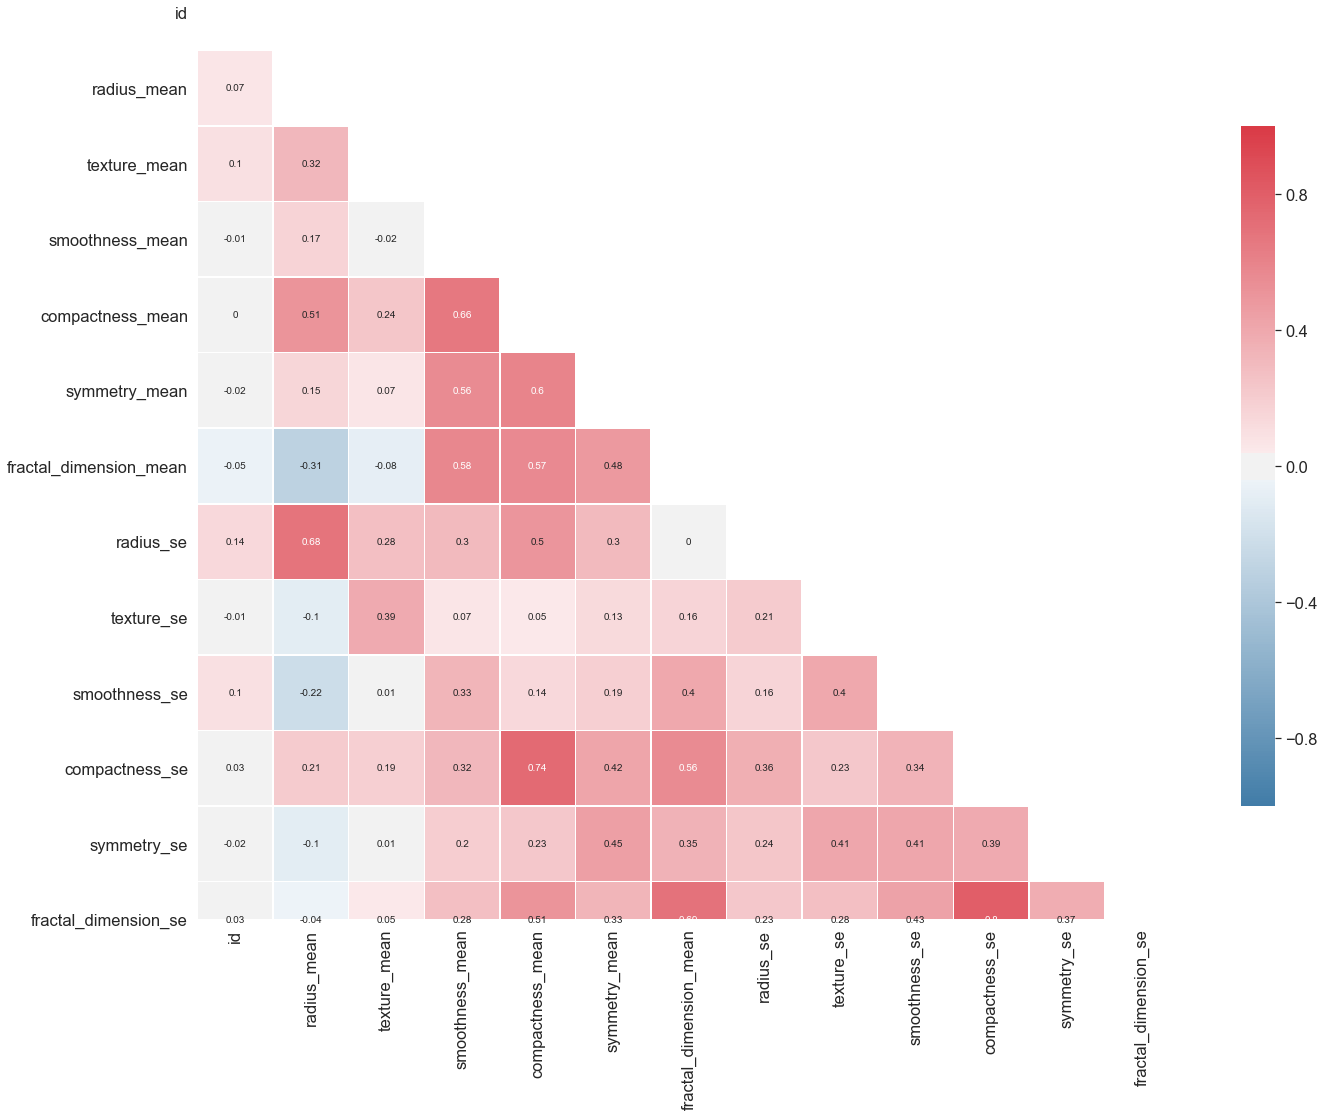

In [11]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Covering the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set the figure size
f, ax = plt.subplots(figsize=(20, 20))

# Defining a custom colormap
cmap = sns.diverging_palette(240, 10, n = 9, as_cmap = True)

# Plotting a Heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


plt.tight_layout()

# 3. My  1𝑠𝑡  Model
___

We will start by first splitting our dataset into two parts, namely a training set for the model, and the other a test set to validate the predictions that the model will make. We will set the test size to 0.3 or in other words 70% of the data will be used to train our model, and 30% will be used to test it out. We shall also set the random seed to 7.

In [16]:
# Splitting of the data into training and testing sets

X = df
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

In [17]:
# Create a string for the formula argument

cols = df.columns.drop('diagnosis')

formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

diagnosis ~ id + radius_mean + texture_mean + smoothness_mean + compactness_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + symmetry_se + fractal_dimension_se 



In [18]:
# Running our model and reporting the results

model = smf.glm(formula = formula, data = X_train, family = sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  381
Model:                                          GLM   Df Residuals:                      367
Model Family:                              Binomial   Df Model:                           13
Link Function:                                logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -47.239
Date:                              Mon, 10 Feb 2020   Deviance:                       94.478
Time:                                      13:37:17   Pearson chi2:                     200.
No. Iterations:                                   9                                         
Covariance Type:                          nonrobust                                         
                             coef    std err          z      P>|z|    

# 3. My  1𝑠𝑡  Prediction

We have successfully developed our Logistic Regression Model. The Logistic Regression Model can take some unlabeled data and effectively assign each observation a probability ranging from 0 to 1. 

This is the key feature of a logistic regression model. In other words, instead of a range of values between 0 or 1, the predictions should show "M" denoting Malignant or "B" denoting Benign. 

For our model, a probability of 1 corresponds to the "Benign" class, whereas a probability of 0 corresponds to the "Malignant" class. Therefore, we consider a threshhold value of 0.5 for our predictions, assigning all values that tend to 0 a label of "M" and assigning values that tend to 1 a label of "B". 

In [19]:
# Predicting the test data and displaying the first 5 predictions.
predictions = logistic_fit.predict(X_test)
predictions[1:6]

259    0.000032
115    0.917213
60     0.996975
275    0.907487
53     0.000023
dtype: float64

In [20]:
# Labeling our prediction values and displaying the first 5 predictions.
predictions_label = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_label[1:6]

['M', 'B', 'B', 'B', 'M']

In [21]:
print(classification_report(y_test, predictions_label, digits = 3))

matrix = confusion_matrix(y_test, predictions_label)

true_negative = matrix[0][0]
false_positive = matrix[0][1]
false_negative = matrix[1][0]
true_positive = matrix[1][1]

print('Confusion Matrix: \n', matrix, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(predictions_label) * 100, 1), '%')

              precision    recall  f1-score   support

           B      0.947     0.969     0.958       129
           M      0.929     0.881     0.904        59

    accuracy                          0.941       188
   macro avg      0.938     0.925     0.931       188
weighted avg      0.941     0.941     0.941       188

Confusion Matrix: 
 [[125   4]
 [  7  52]] 

True Negative: 125
False Positive: 4
False Negative: 7
True Positive: 52
Correct Predictions 94.1 %


Our model has an accuracy of 94.1% 

# 5. My  2𝑛𝑑  Model
___

We will start by first splitting our dataset into two parts, namely a training set for the model, and the other a test set to validate the predictions that the model will make. We will set the test size to 0.3 or in other words 70% of the data will be used to train our model, and 30% will be used to test it out. We shall also set the random seed to 7.

In [22]:
bcr = df.diagnosis
bcr.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [23]:
bcd = pd.get_dummies(bcr)
bcd.head()

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [24]:
bcdm = bcd.M
bcdm.head()

0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

In [25]:
# Splitting of the data into training and testing sets

X = df.drop('diagnosis', axis = 1)
y = bcdm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [26]:
math.sqrt(len(y_test))

13.076696830622021

In [27]:
for x in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors = x)
    knn_fit = knn.fit(X_train, y_train)
    predictions = knn_fit.predict(X_test)
    predictions[1:6]
    print(classification_report(y_test, predictions, digits = 3))

    matrix = confusion_matrix(y_test, predictions)

    true_negative = matrix[0][0]
    false_positive = matrix[0][1]
    false_negative = matrix[1][0]
    true_positive = matrix[1][1]

    print('Confusion Matrix: \n', matrix, '\n')

    print('True Negative:', true_negative)
    print('False Positive:', false_positive)
    print('False Negative:', false_negative)
    print('True Positive:', true_positive)
    print('Correct Predictions', round((true_negative + true_positive) / len(predictions) * 100, 1), '%')
    print(x)


              precision    recall  f1-score   support

           0      0.750     0.621     0.679       116
           1      0.413     0.564     0.477        55

    accuracy                          0.602       171
   macro avg      0.582     0.592     0.578       171
weighted avg      0.642     0.602     0.614       171

Confusion Matrix: 
 [[72 44]
 [24 31]] 

True Negative: 72
False Positive: 44
False Negative: 24
True Positive: 31
Correct Predictions 60.2 %
1
              precision    recall  f1-score   support

           0      0.721     0.871     0.789       116
           1      0.516     0.291     0.372        55

    accuracy                          0.684       171
   macro avg      0.619     0.581     0.581       171
weighted avg      0.655     0.684     0.655       171

Confusion Matrix: 
 [[101  15]
 [ 39  16]] 

True Negative: 101
False Positive: 15
False Negative: 39
True Positive: 16
Correct Predictions 68.4 %
2
              precision    recall  f1-score   support

In [28]:
knn = KNeighborsClassifier(n_neighbors = 16)

In [29]:
knn_fit = knn.fit(X_train, y_train)

In [30]:
# Predicting the test data and displaying the first 5 predictions.
predictions = knn_fit.predict(X_test)
predictions[1:6]

array([0, 0, 0, 0, 0], dtype=uint8)

In [31]:
print(classification_report(y_test, predictions, digits = 3))

matrix = confusion_matrix(y_test, predictions)

true_negative = matrix[0][0]
false_positive = matrix[0][1]
false_negative = matrix[1][0]
true_positive = matrix[1][1]

print('Confusion Matrix: \n', matrix, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(predictions) * 100, 1), '%')

              precision    recall  f1-score   support

           0      0.743     0.922     0.823       116
           1      0.667     0.327     0.439        55

    accuracy                          0.731       171
   macro avg      0.705     0.625     0.631       171
weighted avg      0.718     0.731     0.700       171

Confusion Matrix: 
 [[107   9]
 [ 37  18]] 

True Negative: 107
False Positive: 9
False Negative: 37
True Positive: 18
Correct Predictions 73.1 %
